# M3 T01: Exercicis de training i test sets

Familiaritza't amb la programació científica mitjantçant la llibreria SKLearn / Scikitlearn.

## Nivell 1 - Exercici 1

Parteix el conjunt de dadesDelayedFlights.csv en train i test. Estudia els dos conjunts per separat, a nivell descriptiu.

_Llegim les dades que estan en format CSV, **DelayedFlights.csv**, per això necessitem carregar la llibreria **pandas**. Aprofitarem per a carregar també la llibreria **matplotlib**_

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./../data/DelayedFlights.csv', index_col=0)

C:\Users\Nuria\anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


_Mirem les característiques de les dades carregades:_

In [12]:
df.shape

(1936758, 29)

In [13]:
df.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

_Es disposen de 1.936.758 dades de vols i 29 variables. Entre les quals es troba la variable **ArrDelay** que serà la nostra variable resposta (y), la resta seran variables explicatives o independents(X). Creem els conjunts de dades corresponents_

In [14]:
X, y = df.loc[:, df.columns != 'ArrDelay'], df.loc[:, df.columns == 'ArrDelay']
print(X.shape, y.shape)
print(X.columns, y.columns)

(1936758, 28) (1936758, 1)
Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'DepDelay', 'Origin',
       'Dest', 'Distance', 'TaxiIn', 'TaxiOut', 'Cancelled',
       'CancellationCode', 'Diverted', 'CarrierDelay', 'WeatherDelay',
       'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object') Index(['ArrDelay'], dtype='object')


_Ara el conjunt de dades **X** té 28 variables, i el **y** 1 variable, que és la variable **ArrDelay**. I de moment, ambdos conjunts de dades tenen dades de 1.936.758 vols_

_Partim els conjunts de dades en Train i Test. Per això necessitem carregar **train_test_split** de la llibreria **sklearn.model_selection**. Farem que Train tingui el 67% de les observacions i Test el 33% restant, amb la instrucció **shape** ho revisarem_

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1297627, 28) (639131, 28) (1297627, 1) (639131, 1)


_Estudiem els dos conjunts per separat, a nivell descriptiu_

In [16]:
print(X_train['AirTime'].describe(), X_test['AirTime'].describe())

count    1.291994e+06
mean     1.082641e+02
std      6.858185e+01
min      0.000000e+00
25%      5.800000e+01
50%      9.000000e+01
75%      1.370000e+02
max      6.640000e+02
Name: AirTime, dtype: float64 count    636377.000000
mean        108.303537
std          68.765841
min           1.000000
25%          58.000000
50%          90.000000
75%         137.000000
max        1091.000000
Name: AirTime, dtype: float64


In [17]:
print(X_train['DepDelay'].describe(), X_test['DepDelay'].describe())

count    1.297627e+06
mean     4.316610e+01
std      5.332964e+01
min      6.000000e+00
25%      1.200000e+01
50%      2.400000e+01
75%      5.300000e+01
max      2.467000e+03
Name: DepDelay, dtype: float64 count    639131.000000
mean         43.223909
std          53.550152
min           6.000000
25%          12.000000
50%          24.000000
75%          53.000000
max        2457.000000
Name: DepDelay, dtype: float64


In [18]:
print(y_train['ArrDelay'].describe(), y_test['ArrDelay'].describe())

count    1.291994e+06
mean     4.219159e+01
std      5.672253e+01
min     -1.090000e+02
25%      9.000000e+00
50%      2.400000e+01
75%      5.600000e+01
max      2.453000e+03
Name: ArrDelay, dtype: float64 count    636377.000000
mean         42.216724
std          56.910803
min         -68.000000
25%           9.000000
50%          24.000000
75%          56.000000
max        2461.000000
Name: ArrDelay, dtype: float64


Gener       122870
Febrer      126924
Març        134440
Abril       104101
Maig        102443
Juny        134654
Juliol      122637
Agost       109037
Setembre     63950
Octubre      69253
Novembre     70670
Desembre    136648
Name: Month, dtype: int64


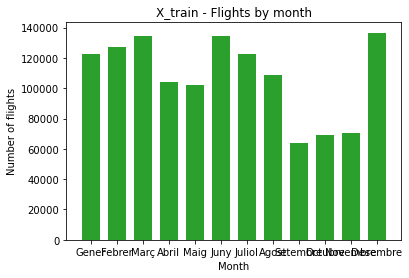

In [19]:
mes_X_train = X_train['Month'].value_counts(sort = False)
mes_X_train.index = ('Gener','Febrer','Març','Abril','Maig','Juny','Juliol','Agost','Setembre','Octubre','Novembre','Desembre')
print(mes_X_train)
plt.bar(mes_X_train.index,mes_X_train.values,width=0.7,color='C2')
plt.xlabel("Month")
plt.ylabel("Number of flights")
plt.title("X_train - Flights by month")
plt.show()

Gener       60657
Febrer      62610
Març        66402
Abril       51163
Maig        50629
Juny        66260
Juliol      60308
Agost       53611
Setembre    31589
Octubre     34272
Novembre    34893
Desembre    66737
Name: Month, dtype: int64


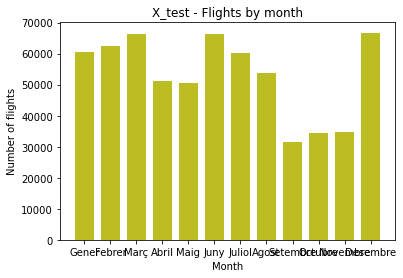

In [23]:
mes_X_test = X_test['Month'].value_counts(sort = False)
mes_X_test.index = ('Gener','Febrer','Març','Abril','Maig','Juny','Juliol','Agost','Setembre','Octubre','Novembre','Desembre')
print(mes_X_test)
plt.bar(mes_X_test.index,mes_X_test.values,width=0.7,color='C8')
plt.xlabel("Month")
plt.ylabel("Number of flights")
plt.title("X_test - Flights by month")
plt.show()

Dll    194741
Dm     175351
Dx     175949
Dj     193830
Dv     216522
Ds     149710
Dg     191524
Name: DayOfWeek, dtype: int64


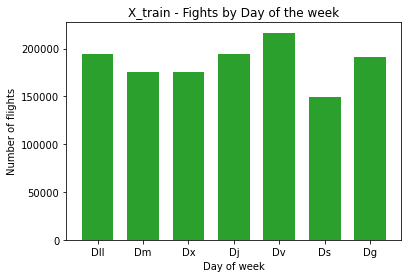

In [20]:
dia_X_train = X_train['DayOfWeek'].value_counts(sort = False)
dia_X_train.index = ('Dll','Dm','Dx','Dj','Dv','Ds','Dg')
print(dia_X_train)
plt.bar(dia_X_train.index,dia_X_train.values,width=0.7,color='C2')
plt.xlabel("Day of week")
plt.ylabel("Number of flights")
plt.title("X_train - Fights by Day of the week")
plt.show()

Dll     96192
Dm      85592
Dx      86856
Dj      95621
Dv     106737
Ds      73546
Dg      94587
Name: DayOfWeek, dtype: int64


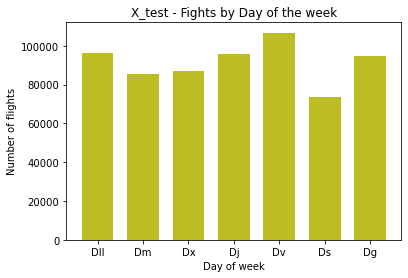

In [21]:
dia_X_test = X_test['DayOfWeek'].value_counts(sort = False)
dia_X_test.index = ('Dll','Dm','Dx','Dj','Dv','Ds','Dg')
print(dia_X_test)
plt.bar(dia_X_test.index,dia_X_test.values,width=0.7,color='C8')
plt.xlabel("Day of week")
plt.ylabel("Number of flights")
plt.title("X_test - Fights by Day of the week")
plt.show()

In [22]:
cancel_X_train = X_train['Cancelled'].value_counts()
cancel_X_train

0    1297190
1        437
Name: Cancelled, dtype: int64

In [23]:
cancel_X_test = X_test['Cancelled'].value_counts()
cancel_X_test

0    638935
1       196
Name: Cancelled, dtype: int64

## Nivell 2 - Exercici 2

Aplica algun procés de transformació (estandarditzar les dades numèriques, crear columnes dummies, polinomis...)

- _Estandarditzar dades numèriques (Farem servir **StandardScaler** de la llibreria **sklearn.preprocessing**):_

In [24]:
from sklearn.preprocessing import StandardScaler

#list for cols to scale
cols_to_scale = ['AirTime','DepDelay']

#create and fit scaler
scaler = StandardScaler()
scaler.fit(X_train[cols_to_scale])

#scale selected data
X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])

<ipython-input-24-09483deec184>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[cols_to_scale] = scaler.transform(X_train[cols_to_scale])
C:\Users\Nuria\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [25]:
#create and fit scaler
scaler = StandardScaler()
scaler.fit(X_test[cols_to_scale])

#scale selected data
X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

<ipython-input-25-a8915bd04e54>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[cols_to_scale] = scaler.transform(X_test[cols_to_scale])
C:\Users\Nuria\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


- _Crear columnes dummies_

In [26]:
X_train.cancel = X_train[X_train['Cancelled'] == 1]
code_cancel = X_train.cancel['CancellationCode'].value_counts()
code_cancel

<ipython-input-26-f7d6b575930c>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.cancel = X_train[X_train['Cancelled'] == 1]


B    217
A    164
C     56
Name: CancellationCode, dtype: int64

In [27]:
dummy = pd.get_dummies(X_train.cancel['CancellationCode'])

In [28]:
X_train.cancel2 = pd.concat([X_train.cancel, dummy], axis = 1)
X_train.cancel2.head()

<ipython-input-28-14e3e815dc1a>:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.cancel2 = pd.concat([X_train.cancel, dummy], axis = 1)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,A,B,C
6572715,2008,12,10,3,1955.0,1810,NaN,1927,XE,2307,...,B,0,NaN,NaN,NaN,NaN,NaN,0,1,0
6980518,2008,12,19,5,1502.0,1205,NaN,1654,CO,661,...,B,0,NaN,NaN,NaN,NaN,NaN,0,1,0
5739707,2008,10,29,3,2032.0,1900,NaN,2000,MQ,3031,...,B,0,NaN,NaN,NaN,NaN,NaN,0,1,0
6838330,2008,12,16,2,1604.0,1425,NaN,1615,MQ,4177,...,C,0,NaN,NaN,NaN,NaN,NaN,0,0,1
6915056,2008,12,26,5,2054.0,1955,NaN,2155,AA,1081,...,B,0,NaN,NaN,NaN,NaN,NaN,0,1,0


## Nivell 3 - Exercici 3

Resumeix les noves columnes generades de manera estadística i gràfica

In [29]:
print(X_train['AirTime'].describe(), X_test['AirTime'].describe())

count    1.291994e+06
mean    -1.947192e-17
std      1.000000e+00
min     -1.578613e+00
25%     -7.329077e-01
50%     -2.663118e-01
75%      4.190010e-01
max      8.103252e+00
Name: AirTime, dtype: float64 count    6.363770e+05
mean    -4.451285e-17
std      1.000001e+00
min     -1.560420e+00
25%     -7.315198e-01
50%     -2.661721e-01
75%      4.173073e-01
max      1.429049e+01
Name: AirTime, dtype: float64


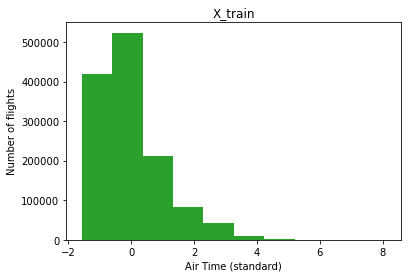

In [30]:
plt.hist(X_train['AirTime'],color='C2')
plt.xlabel("Air Time (standard)")
plt.ylabel("Number of flights")
plt.title("X_train")
plt.show()

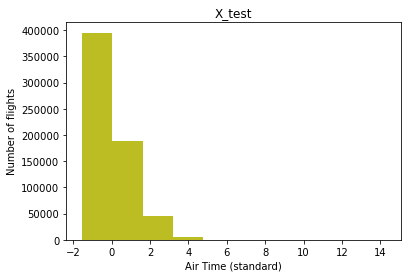

In [31]:
plt.hist(X_test['AirTime'],color='C8')
plt.xlabel("Air Time (standard)")
plt.ylabel("Number of flights")
plt.title("X_test")
plt.show()

In [32]:
print(X_train['DepDelay'].describe(), X_test['DepDelay'].describe())

count    1.297627e+06
mean    -1.721017e-16
std      1.000000e+00
min     -6.969129e-01
25%     -5.844051e-01
50%     -3.593894e-01
75%      1.843985e-01
max      4.545005e+01
Name: DepDelay, dtype: float64 count    6.391310e+05
mean     2.000370e-16
std      1.000001e+00
min     -6.951229e-01
25%     -5.830783e-01
50%     -3.589892e-01
75%      1.825597e-01
max      4.507509e+01
Name: DepDelay, dtype: float64


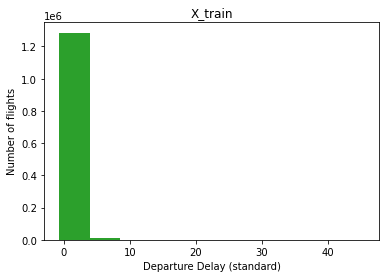

In [33]:
plt.hist(X_train['DepDelay'],color='C2')
plt.xlabel("Departure Delay (standard)")
plt.ylabel("Number of flights")
plt.title("X_train")
plt.show()

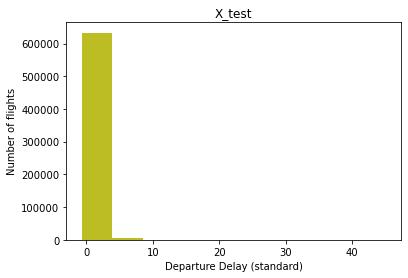

In [34]:
plt.hist(X_test['DepDelay'],color='C8')
plt.xlabel("Departure Delay (standard)")
plt.ylabel("Number of flights")
plt.title("X_test")
plt.show()

_Vols cancel·lats_

In [35]:
aggregations={
    'A':sum,
    'B':sum,
    'C':sum,
             }
X_train.cancel2.grups = X_train.cancel2.agg(aggregations)
X_train.cancel2.grups

<ipython-input-35-e1aa3fdeb927>:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  X_train.cancel2.grups = X_train.cancel2.agg(aggregations)


A    164
B    217
C     56
dtype: int64

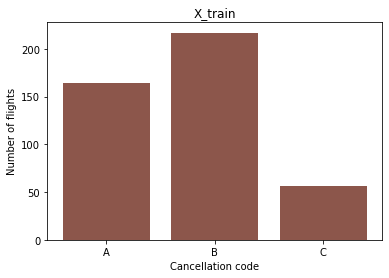

In [36]:
plt.bar(X_train.cancel2.grups.index,X_train.cancel2.grups.values,color='C5')
plt.xlabel("Cancellation code")
plt.ylabel("Number of flights")
plt.title("X_train")
plt.show()